<a href="https://colab.research.google.com/github/susant146/PyTorch_Basics_CNNmodels/blob/main/CNN_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries & Device Set-up**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchsummary import summary

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


**Mount Drive and Download Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Create DataLoader**

In [ ]:
# Hyper-parameters
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='/content/drive/MyDrive/CIFAR10', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='/content/drive/MyDrive/CIFAR10', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


**Visualize Image Data**

images shape:  torch.Size([4, 3, 32, 32])


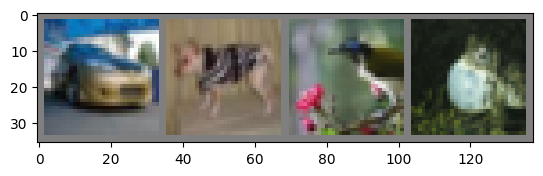

In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
print('images shape: ', images.shape)
# show images
imshow(torchvision.utils.make_grid(images))

**Define CNN Model**

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

# Analyze the weights and bias
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


**Training Loop**

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

Epoch [1/5], Step [2000/12500], Loss: 2.2851
Epoch [1/5], Step [4000/12500], Loss: 2.2777
Epoch [1/5], Step [6000/12500], Loss: 2.2909
Epoch [1/5], Step [8000/12500], Loss: 2.2559
Epoch [1/5], Step [10000/12500], Loss: 2.3251
Epoch [1/5], Step [12000/12500], Loss: 2.2018
Epoch [2/5], Step [2000/12500], Loss: 2.3956
Epoch [2/5], Step [4000/12500], Loss: 1.6370
Epoch [2/5], Step [6000/12500], Loss: 2.5599
Epoch [2/5], Step [8000/12500], Loss: 1.0549
Epoch [2/5], Step [10000/12500], Loss: 1.6288
Epoch [2/5], Step [12000/12500], Loss: 1.6886
Epoch [3/5], Step [2000/12500], Loss: 1.5858
Epoch [3/5], Step [4000/12500], Loss: 1.4582
Epoch [3/5], Step [6000/12500], Loss: 2.1180
Epoch [3/5], Step [8000/12500], Loss: 1.7977
Epoch [3/5], Step [10000/12500], Loss: 1.3440
Epoch [3/5], Step [12000/12500], Loss: 1.1611
Epoch [4/5], Step [2000/12500], Loss: 1.5759
Epoch [4/5], Step [4000/12500], Loss: 1.0072
Epoch [4/5], Step [6000/12500], Loss: 1.4280
Epoch [4/5], Step [8000/12500], Loss: 2.1164
Epoc

**Load the saved model for Inference**

In [ ]:
# Load the saved model weights
PATH = './cnn.pth'
model.load_state_dict(torch.load(PATH))  # Load the trained weights
model.to(device)  # Move model to GPU if available
model.eval()  # Set model to evaluation mode

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for _ in range(10)]
    n_class_samples = [0 for _ in range(10)]

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Perform inference using the loaded model
        outputs = model(images)

        # max returns (value, index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(len(labels)):  # Adjusted to avoid index out of range
            label = labels[i].item()
            pred = predicted[i].item()
            if label == pred:
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Overall Accuracy of the network: {acc:.2f} %')

    for i in range(10):
        if n_class_samples[i] > 0:
            class_acc = 100.0 * n_class_correct[i] / n_class_samples[i]
            print(f'Accuracy of {classes[i]}: {class_acc:.2f} %')


<ipython-input-12-52c2918e2725>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(PATH))  # Load the trained weights


Overall Accuracy of the network: 48.41 %
Accuracy of plane: 58.40 %
Accuracy of car: 51.20 %
Accuracy of bird: 38.40 %
Accuracy of cat: 24.30 %
Accuracy of deer: 40.60 %
Accuracy of dog: 41.70 %
Accuracy of frog: 58.30 %
Accuracy of horse: 56.60 %
Accuracy of ship: 62.10 %
Accuracy of truck: 52.50 %


In [ ]:
n_class_correct = [0 for _ in range(10)]
print(n_class_correct)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
